In [2]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
import imutils

In [3]:
image = cv.imread("maze01.jpg",1)
orig = image.copy()

In [4]:
image

array([[[116, 122, 121],
        [115, 121, 120],
        [114, 120, 119],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [131, 140, 144]],

       [[113, 119, 118],
        [113, 119, 118],
        [112, 118, 117],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [130, 139, 143]],

       [[112, 118, 117],
        [112, 118, 117],
        [113, 119, 118],
        ...,
        [129, 138, 142],
        [129, 138, 142],
        [129, 138, 142]],

       ...,

       [[142, 144, 152],
        [141, 143, 151],
        [143, 145, 153],
        ...,
        [180, 181, 191],
        [183, 184, 194],
        [179, 180, 190]],

       [[145, 147, 155],
        [144, 146, 154],
        [145, 147, 155],
        ...,
        [180, 181, 191],
        [178, 179, 189],
        [169, 170, 180]],

       [[148, 150, 158],
        [147, 149, 157],
        [147, 149, 157],
        ...,
        [174, 175, 185],
        [168, 169, 179],
        [156, 157, 167]]

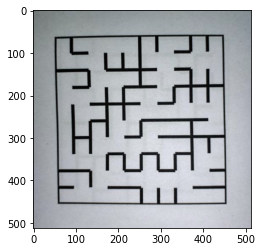

In [5]:
plt.imshow(image)
plt.show()

In [6]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

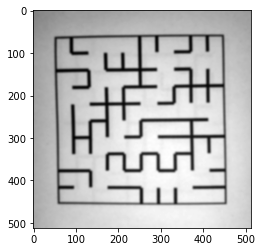

In [7]:
gray = cv.GaussianBlur(gray, (9,9), 2)
plt.imshow(gray)
imgplot1 = plt.imshow(gray, cmap='gray')



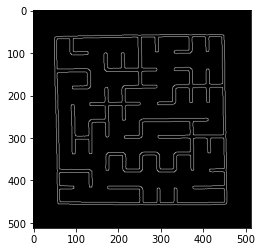

In [8]:
edged = cv.Canny(gray, 50, 200)

plt.imshow(edged)
imgplot = plt.imshow(edged, cmap='gray')

In [9]:
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts


([array([[[ 61, 372]],
  
         [[ 62, 373]],
  
         [[ 65, 373]],
  
         [[ 66, 374]],
  
         [[ 88, 374]],
  
         [[ 89, 373]],
  
         [[ 90, 374]],
  
         [[127, 374]],
  
         [[128, 373]],
  
         [[129, 374]],
  
         [[132, 374]],
  
         [[134, 376]],
  
         [[135, 376]],
  
         [[138, 379]],
  
         [[138, 394]],
  
         [[139, 395]],
  
         [[139, 411]],
  
         [[138, 412]],
  
         [[138, 414]],
  
         [[137, 415]],
  
         [[136, 415]],
  
         [[135, 416]],
  
         [[134, 415]],
  
         [[133, 415]],
  
         [[132, 414]],
  
         [[132, 410]],
  
         [[131, 409]],
  
         [[131, 382]],
  
         [[130, 381]],
  
         [[ 63, 381]],
  
         [[ 61, 383]],
  
         [[ 62, 384]],
  
         [[ 61, 385]],
  
         [[ 61, 393]],
  
         [[ 62, 394]],
  
         [[ 62, 411]],
  
         [[ 63, 412]],
  
         [[ 74, 412]],
  
         [[ 

In [10]:
if len(cnts) == 2:
        cnts = cnts[0]

    # if the length of the contours tuple is '3' then we are using
    # either OpenCV v3, v4-pre, or v4-alpha
elif len(cnts) == 3:
        cnts = cnts[1]



In [11]:
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
# loop over the contours

	# show the contour (outline) of the piece of paper


In [12]:
len1 = len(cnts)
len1


13

In [13]:
for c in cnts:
# approximate the contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.05 * peri, True)
    print(len(approx))
# if our approximated contour has four points, then we
# can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break


4


In [14]:
print("STEP 2: Find contours of paper")
print(screenCnt)
cv.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

STEP 2: Find contours of paper
[[[447  58]]

 [[ 51  63]]

 [[ 59 455]]

 [[454 454]]]


array([[[116, 122, 121],
        [115, 121, 120],
        [114, 120, 119],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [131, 140, 144]],

       [[113, 119, 118],
        [113, 119, 118],
        [112, 118, 117],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [130, 139, 143]],

       [[112, 118, 117],
        [112, 118, 117],
        [113, 119, 118],
        ...,
        [129, 138, 142],
        [129, 138, 142],
        [129, 138, 142]],

       ...,

       [[142, 144, 152],
        [141, 143, 151],
        [143, 145, 153],
        ...,
        [180, 181, 191],
        [183, 184, 194],
        [179, 180, 190]],

       [[145, 147, 155],
        [144, 146, 154],
        [145, 147, 155],
        ...,
        [180, 181, 191],
        [178, 179, 189],
        [169, 170, 180]],

       [[148, 150, 158],
        [147, 149, 157],
        [147, 149, 157],
        ...,
        [174, 175, 185],
        [168, 169, 179],
        [156, 157, 167]]

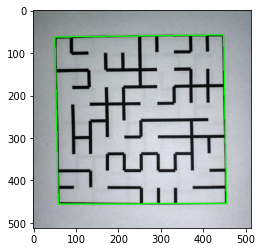

In [15]:
plt.imshow(image)
plt.show()

In [16]:
pts = screenCnt.reshape(4, 2)
print(pts)

[[447  58]
 [ 51  63]
 [ 59 455]
 [454 454]]


In [17]:
rect = np.zeros((4, 2), dtype = "float32")
# the top-left point will have the smallest sum, whereas
# the bottom-right point will have the largest sum
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]
# now, compute the difference between the points, the
# top-right point will have the smallest difference,
# whereas the bottom-left will have the largest difference
diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
# return the ordered coordinates
print(rect)

[[ 51.  63.]
 [447.  58.]
 [454. 454.]
 [ 59. 455.]]


In [18]:
(tl, tr, br, bl) = rect
# compute the width of the new image, which will be the
# maximum distance between bottom-right and bottom-left
# x-coordiates or the top-right and top-left x-coordinates
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
# compute the height of the new image, which will be the
# maximum distance between the top-right and bottom-right
# y-coordinates or the top-left and bottom-left y-coordinates
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
print(f"max width{maxWidth} and max height = {maxHeight}")
# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a "birds eye view",
# (i.e. top-down view) of the image, again specifying points
# in the top-left, top-right, bottom-right, and bottom-left
# order
dst = np.array([
[0, 0],
[maxWidth - 1, 0],
[maxWidth - 1, maxHeight - 1],
[0, maxHeight - 1]], dtype = "float32")
print(dst)

max width396 and max height = 396
[[  0.   0.]
 [395.   0.]
 [395. 395.]
 [  0. 395.]]


In [19]:
M = cv.getPerspectiveTransform(rect, dst)
warped = cv.warpPerspective(orig, M, (maxWidth, maxHeight))

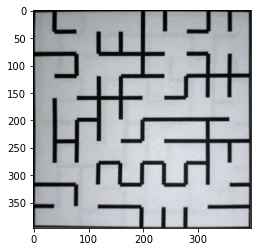

In [20]:
plt.imshow(warped)
plt.show()

In [21]:
gray =  warped
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)
gray.shape
gray = cv.GaussianBlur(gray,(5,5),0)
thresh = cv.copyMakeBorder(gray,5,5,5,5, cv.BORDER_CONSTANT,value=[0,0,0]) 


In [22]:
ret2,thresh2 = cv.threshold(thresh,145,255,cv.THRESH_BINARY)

# changes can be done

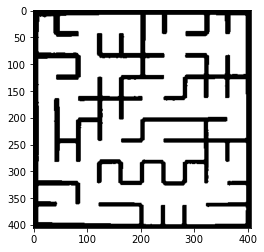

In [23]:
plt.imshow(thresh2,cmap= 'gray')
plt.show()

In [24]:



print(thresh.shape)
resized_image = cv.resize(thresh, (400, 400)) 


(406, 406)


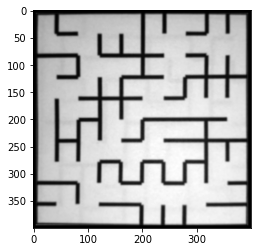

40
40


(400, 400)

In [25]:
plt.imshow(resized_image,cmap= "gray")
cv.imwrite("borderjupyert.jpg",resized_image)
plt.show()
jincrement = resized_image.shape[0]//10
iincrement = resized_image.shape[1]//10
print(jincrement)
print(iincrement)
resized_image.shape

In [ ]:
#for i in range(0,400,40):
#for i in range(0,resized_image.shape[1],iincrement):
i=0 
array = []
ret2,resized_image = cv.threshold(resized_image,100,255,cv.THRESH_BINARY_INV)
plt.imshow(resized_image,cmap= 'gray')
plt.show()
for i in range(0,resized_image.shape[1],iincrement):
    array.append([])
    for j in range(0,resized_image.shape[0],jincrement):


            if(j==0):
                img_temp = resized_image[i:i+40,j:j+44]
            else:
                img_temp = resixef_image[i:i+40,j-10:j+50]
            







            print(i,j)



            '''img_temp = cv.rectangle(img_temp,(0,0),(10,10),[255,255,255],-1)
            img_temp = cv.rectangle(img_temp,(35,0),(44,10),[255,255,255],-1)

            img_temp = cv.rectangle(img_temp,(0,35),(10,45),[255,255,255],-1)

            img_temp = cv.rectangle(img_temp,(35,35),(44,44),[255,255,255],-1)
            '''



            north = 0
            west = 0
            east = 0
            south = 0
            print("outside if")
            #print(img_temp[20,0],img_temp[20,5],img_temp[20,10])
            #print(bool(img_temp[20,0]),bool(img_temp[20,5]),bool(img_temp[20,10]))
            #print(bool(img_temp[20,0]) or bool(img_temp[20,5]) or bool(img_temp[20,10]))




            print("north---------------")
            #print(img_temp[0,20],img_temp[20,5],img_temp[20,10])
            if(img_temp[0,20] or img_temp[5,20] or img_temp[10,20]):

                    north = 2
                    print(f"north {north}")



            print("west----------------")
            #print(img_temp[5,20],img_temp[10,20], img_temp[15,20])
            if(img_temp[20,0] or img_temp[20,10] or img_temp[20,15] or img_temp[15,0]):
                    west = 1
                    print(f" west {west}")



            print("South----------------")
            #print(img_temp[30,20],img_temp[35,20], img_temp[40,20])
            if(img_temp[30,20] or img_temp[35,20] or img_temp[43,20] ):

                    south = 8
                    print(f" south {south}")



            print("East----------------")
            #print(img_temp[30,20],img_temp[35,20], img_temp[40,20])
            if(img_temp[20,30] or img_temp[20,35] or img_temp[20,43] ):

                    east = 4
                    print(f" east {east}")



            array[i//40].append(north + south + east + west)
            plt.imshow(img_temp,cmap= 'gray')
            plt.show()
            print(array)









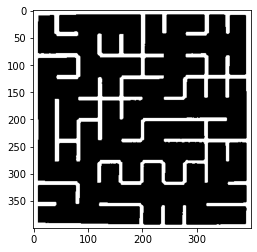

here0
0 0
here01
y_center22
here03
here04
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
(44, 44)


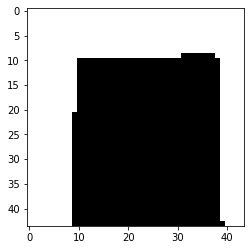

0 1
here2
y_center22
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(44, 49)


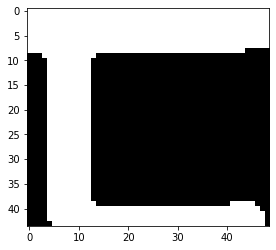

0 2
here2
y_center22
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(44, 49)


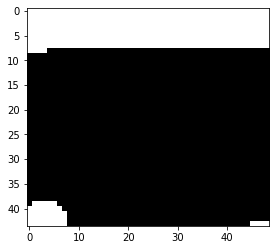

0 3
here2
y_center22
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(44, 49)


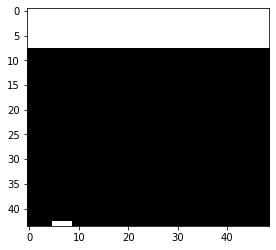

0 4
here2
y_center22
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(44, 49)


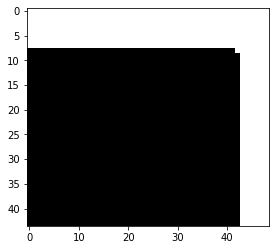

0 5
here2
y_center22
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
(44, 49)


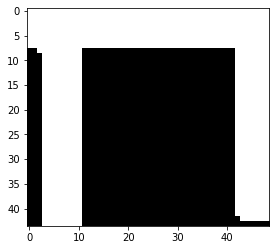

0 6
here2
y_center22
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(44, 49)


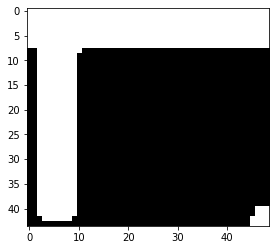

0 7
here2
y_center22
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(44, 49)


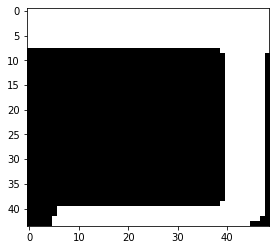

0 8
here2
y_center22
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
(44, 49)


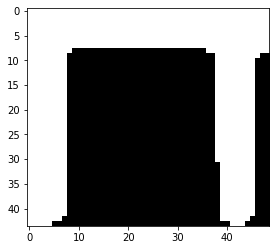

0 9
here2
y_center22
here03
here04
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
(44, 45)


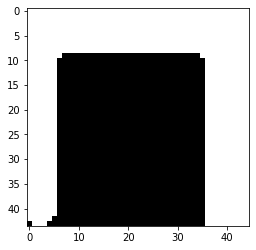

here0
1 0
here01
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 44)


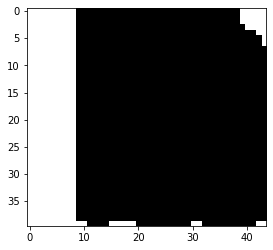

1 1
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


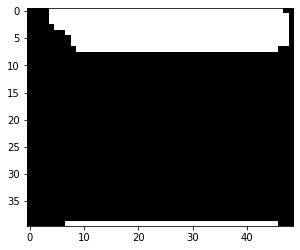

1 2
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


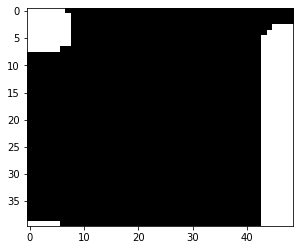

1 3
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


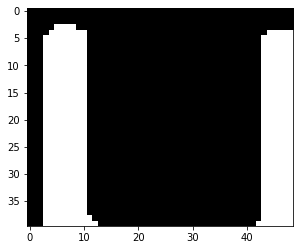

1 4
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


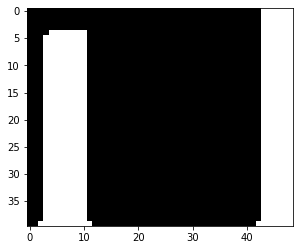

1 5
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


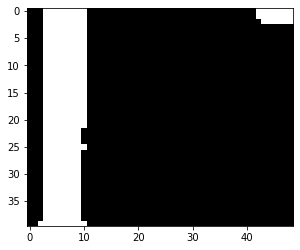

1 6
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


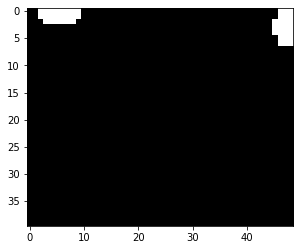

1 7
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


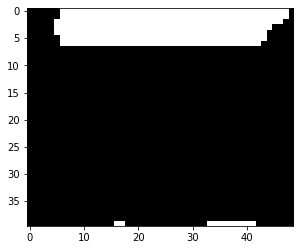

1 8
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


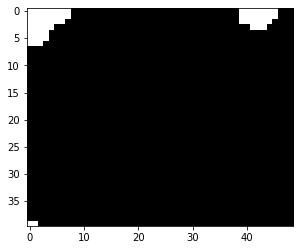

1 9
here2
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
(40, 45)


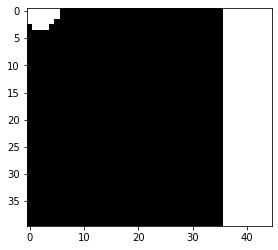

here0
2 0
here01
y_center20
here03
here04
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 44)


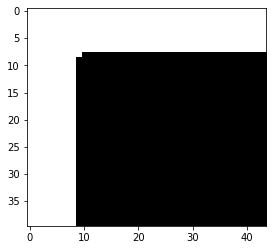

2 1
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 49)


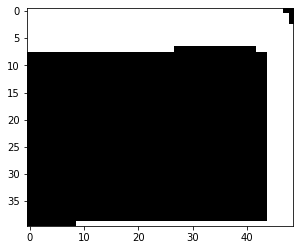

2 2
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


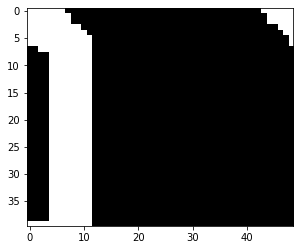

2 3
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


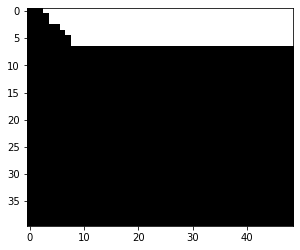

2 4
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


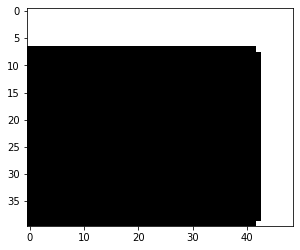

2 5
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


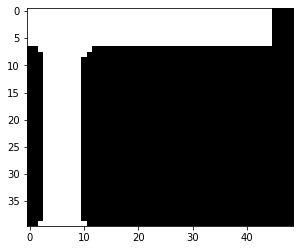

2 6
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


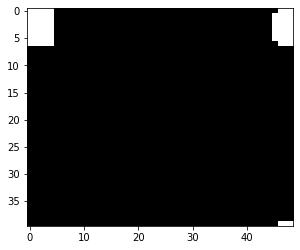

2 7
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 49)


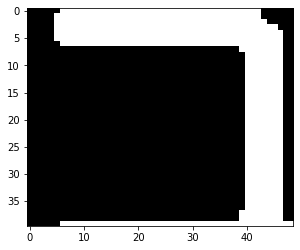

2 8
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
(40, 49)


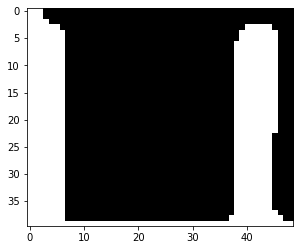

2 9
here2
y_center20
here03
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
(40, 45)


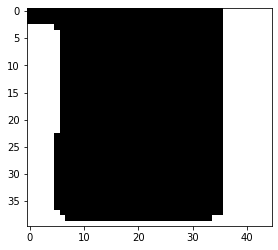

here0
3 0
here01
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 44)


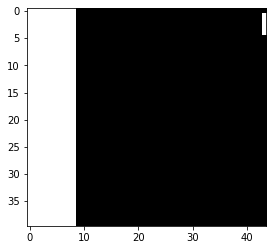

3 1
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


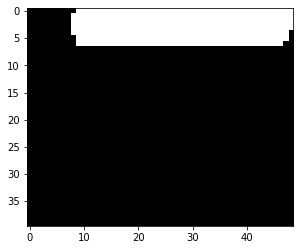

3 2
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 49)


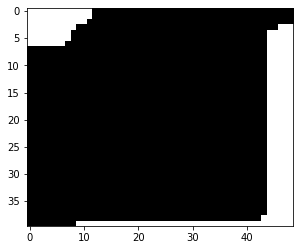

3 3
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 49)


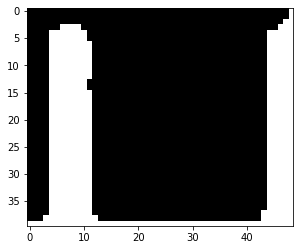

3 4
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


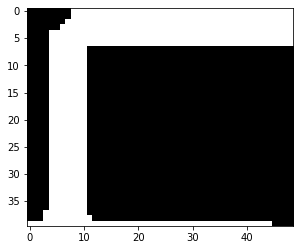

3 5
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


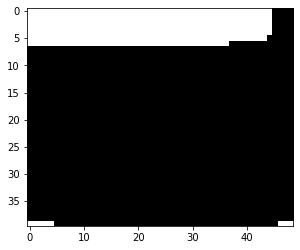

3 6
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 49)


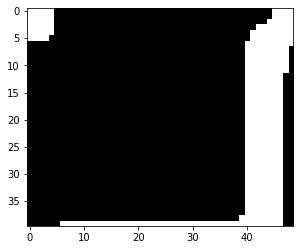

3 7
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
(40, 49)


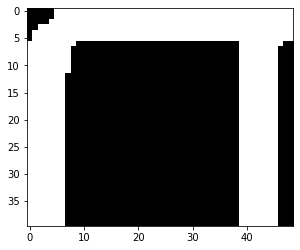

3 8
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
(40, 49)


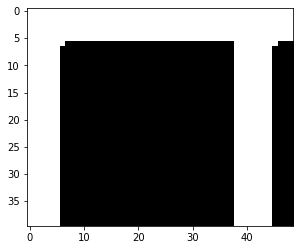

3 9
here2
y_center20
here03
here04
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
(40, 45)


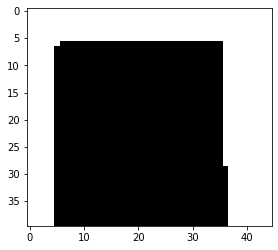

here0
4 0
here01
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 44)


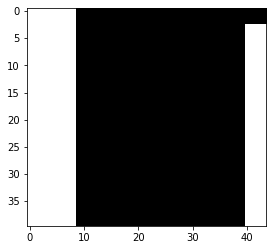

4 1
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


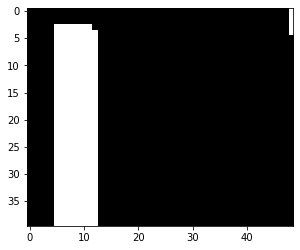

4 2
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 49)


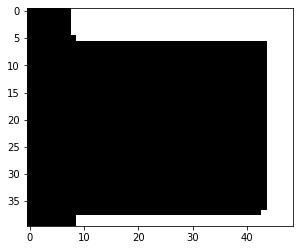

4 3
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 49)


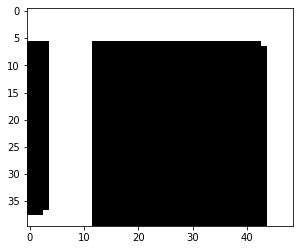

4 4
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


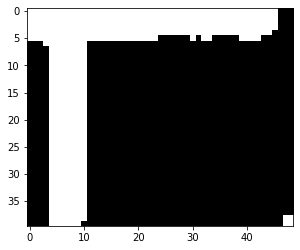

4 5
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


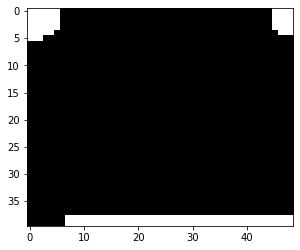

4 6
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


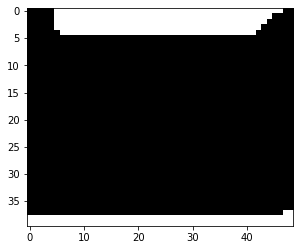

4 7
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


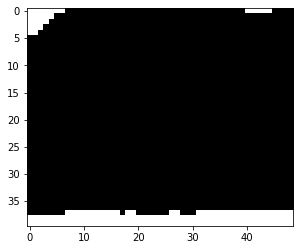

4 8
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


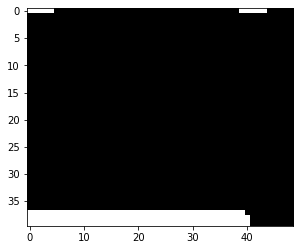

4 9
here2
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
(40, 45)


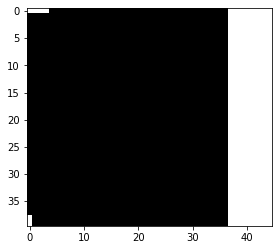

here0
5 0
here01
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 44)


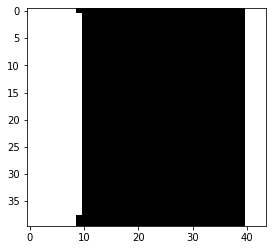

5 1
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
(40, 49)


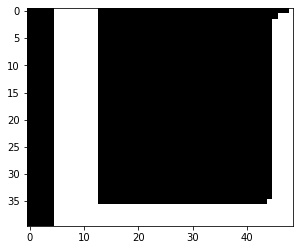

5 2
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 49)


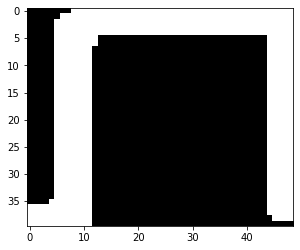

5 3
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


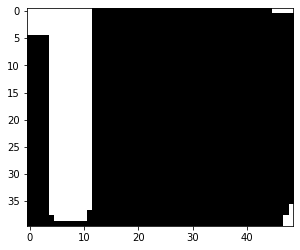

5 4
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


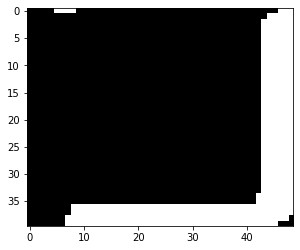

5 5
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


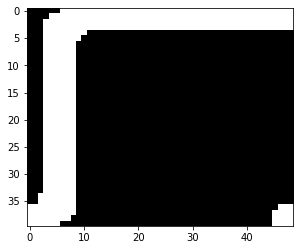

5 6
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


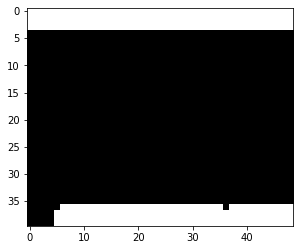

5 7
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
(40, 49)


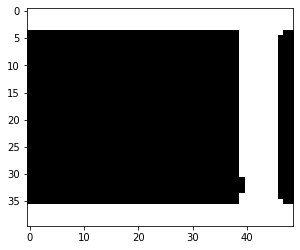

5 8
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


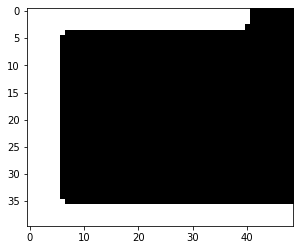

5 9
here2
y_center20
here03
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
(40, 45)


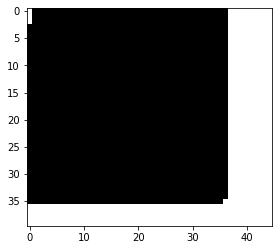

here0
6 0
here01
y_center20
here03
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 44)


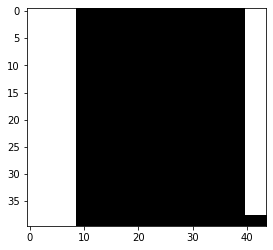

6 1
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
(40, 49)


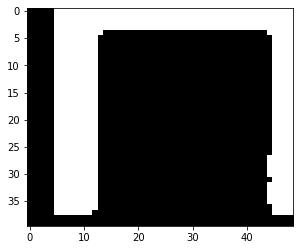

6 2
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


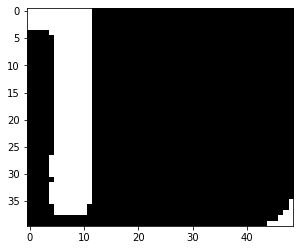

6 3
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


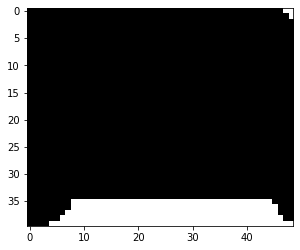

6 4
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


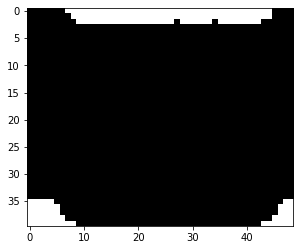

6 5
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


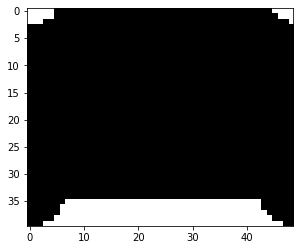

6 6
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


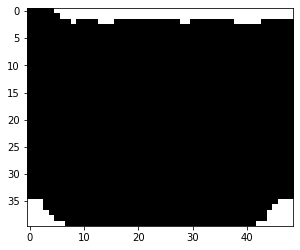

6 7
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 49)


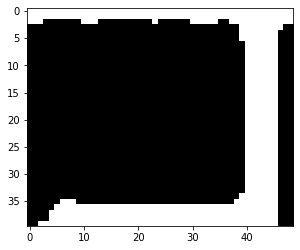

6 8
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
(40, 49)


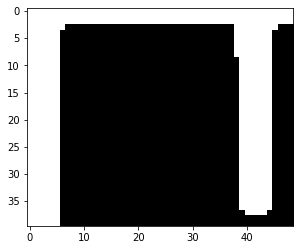

6 9
here2
y_center20
here03
here04
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
(40, 45)


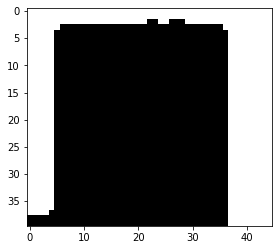

here0
7 0
here01
y_center20
here03
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 44)


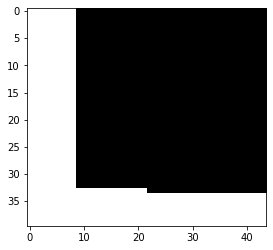

7 1
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


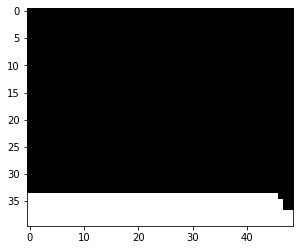

7 2
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


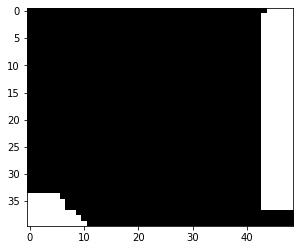

7 3
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


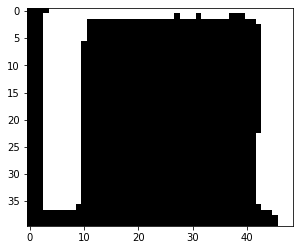

7 4
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
(40, 49)


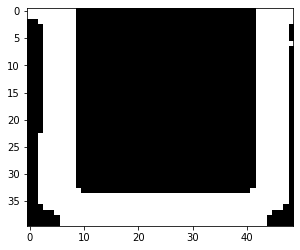

7 5
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
(40, 49)


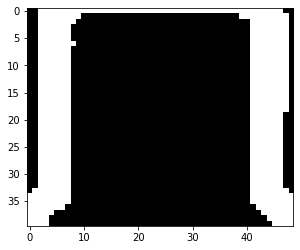

7 6
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 49)


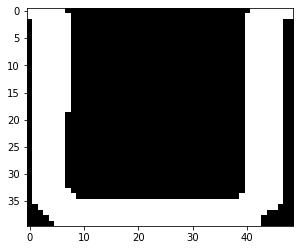

7 7
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 49)


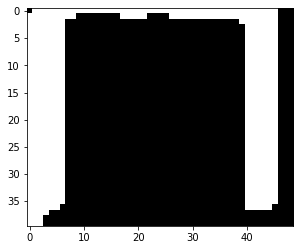

7 8
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


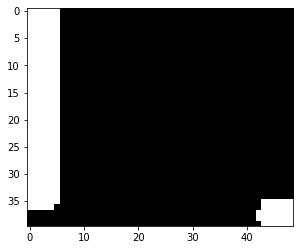

7 9
here2
y_center20
here03
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
(40, 45)


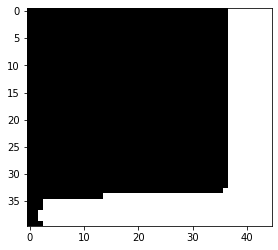

here0
8 0
here01
y_center20
here03
here04
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 44)


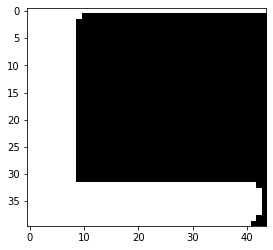

8 1
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
(40, 49)


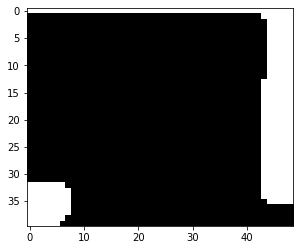

8 2
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


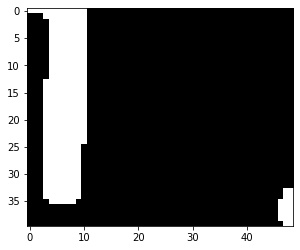

8 3
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


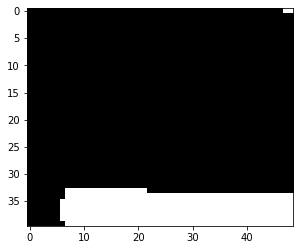

8 4
here2
y_center20
here03
here04
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


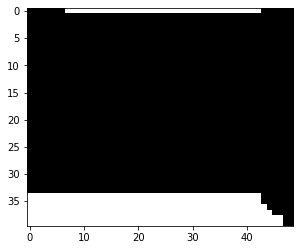

8 5
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


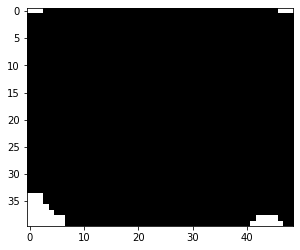

8 6
here2
y_center20
here03
here04
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


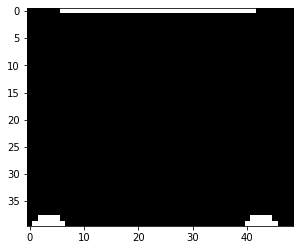

8 7
here2
y_center20
here03
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


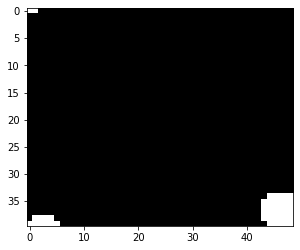

8 8
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


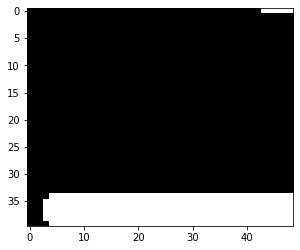

8 9
here2
y_center20
here03
here04
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
(40, 45)


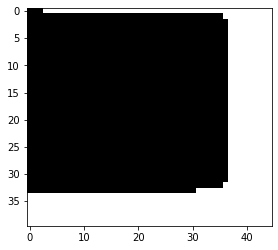

here0
9 0
here01
y_center20
here03
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
(40, 44)


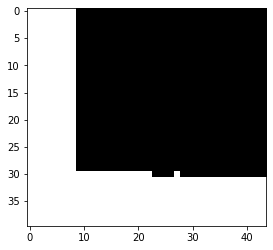

9 1
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


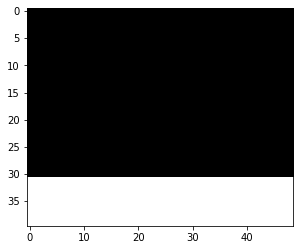

9 2
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


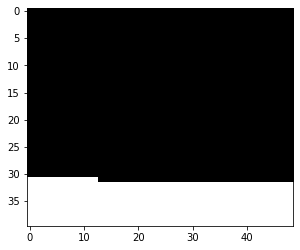

9 3
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


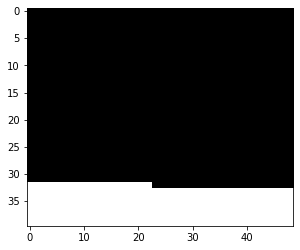

9 4
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
(40, 49)


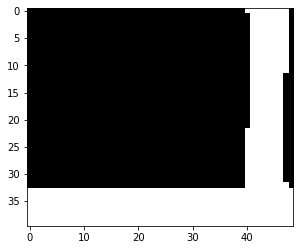

9 5
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
(40, 49)


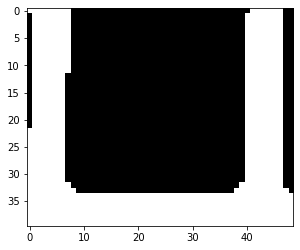

9 6
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
(40, 49)


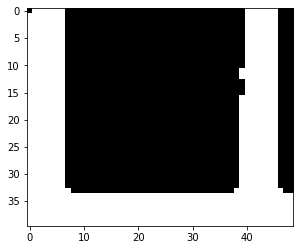

9 7
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


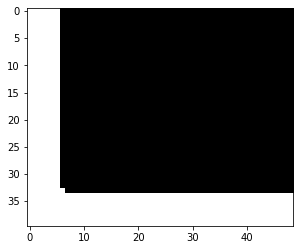

9 8
here2
y_center20
here03
here05
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
37
here06
38
here06
39
here06
40
here06
41
here06
42
here06
43
here06
44
here06
45
here06
46
here06
47
here06
48
here06
49
here06
(40, 49)


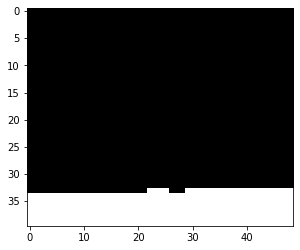

9 9
here2
y_center20
here03
here05
23
here06
24
here06
25
here06
26
here06
27
here06
28
here06
29
here06
30
here06
31
here06
32
here06
33
here06
34
here06
35
here06
36
here06
(40, 45)


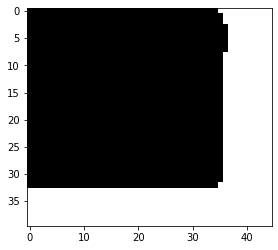

In [26]:
i=0 
array = []
ret2,resized_image = cv.threshold(resized_image,100,255,cv.THRESH_BINARY_INV)
plt.imshow(resized_image,cmap= 'gray')
plt.show()
for i in range(0,resized_image.shape[0],iincrement):
    print("here0")
    array.append([])
    if(i==0):
        iiicrement = 44
    else:
        iiicrement = 40
    for j in range(0,resized_image.shape[1],jincrement):
            print(i//40,j//40)
            if(j==0):
                print("here01")
                img_temp = resized_image[i:i+iiicrement,j:j+44]
            else:
                img_temp = resized_image[i:i+iiicrement,j-5:j+44]
                print("here2")
            north = 0
            west = 0
            east = 0
            south = 0
            x_center = img_temp.shape[1]//2
            y_center = img_temp.shape[0]//2
            print(f"y_center{y_center}")
            print("here03")
            
            
            north_dir = 0
            while(y_center - north_dir >= 0):
                if(img_temp[y_center-north_dir, x_center] == 255):
                    print("here04")
                    north = 2
                    break
                north_dir +=1
                
                
            south_dir = 0
            while(y_center + south_dir  < img_temp.shape[0]):
                if(img_temp[y_center+south_dir,x_center] == 255):
                    south = 8
                    print("here05")
                    break
                south_dir+=1
                
                
            east_dir = 0
            while(x_center + east_dir <  img_temp.shape[1] ):
                if(img_temp[y_center,x_center+east_dir] == 255  or img_temp[15,x_center+east_dir]):
                    east = 4
                    break
                east_dir+=1
                print(x_center+east_dir)
                print("here06")
            west_dir =0
            while(x_center-west_dir >= 0):
                if(img_temp[y_center,x_center-west_dir] == 255):
                            west =1
                            break
                west_dir +=1
            
            

            


            



            array[i//40].append(north + south + east + west)
            print(img_temp.shape)


            
            plt.imshow(img_temp,cmap= 'gray')
            plt.show()
            







In [27]:
print(array)

[[7, 11, 2, 2, 6, 7, 3, 14, 7, 7], [1, 10, 4, 5, 5, 1, 0, 2, 0, 4], [3, 14, 1, 2, 6, 3, 0, 14, 13, 13], [1, 2, 12, 13, 11, 2, 12, 7, 7, 7], [5, 1, 14, 7, 3, 8, 10, 8, 8, 4], [5, 13, 7, 1, 12, 3, 10, 14, 11, 12], [5, 7, 1, 8, 2, 8, 2, 14, 7, 7], [9, 8, 4, 7, 13, 7, 13, 7, 1, 12], [11, 6, 1, 8, 10, 0, 2, 0, 8, 14], [9, 8, 8, 8, 12, 13, 13, 9, 8, 12]]
